In [269]:
import urllib.request
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import altair as alt
from urllib.request import Request, urlopen
import requests
import json
from shapely.geometry import MultiPoint
import os
%matplotlib inline

In [270]:
df=pd.read_csv("hw.csv",dtype={"Bacteria": str})
df_wide=pd.read_csv("hw_wide.csv")

In [271]:
df.tail(5)

,Bacteria,Antibiotic,MIC,Gram Staining
43,Staphylococcus albus,Neomycin,0.001,positive
44,Staphylococcus aureus,Neomycin,0.001,positive
45,Streptococcus fecalis,Neomycin,0.100,positive
46,Streptococcus hemolyticus,Neomycin,10.000,positive
47,Streptococcus viridans,Neomycin,40.000,positive


In [292]:
# df["rank"] = df.groupby(["Antibiotic"])["MIC"].rank("dense", ascending=False)

# df.groupby(["Bacteria ", "Antibiotic"])["MIC"].rank(method='min')

## filter out to three different dataframe based on types of antibiotic

In [273]:
pl=df.loc[df['Antibiotic'] == "Penicilin"]


pl.rename(columns = {'Bacteria ':'Bacteria'}, inplace = True) 
df_wide.rename(columns = {'Bacteria ':'Bacteria'}, inplace = True) 
df_wide.rename(columns = {'Streptomycin ':'Streptomycin'}, inplace = True)
df_wide.rename(columns = {'Gram Staining ':'Gram Staining'}, inplace = True)


print(df_wide.columns)

Index(['Bacteria', 'Penicilin', 'Streptomycin', 'Neomycin', 'Gram Staining'], dtype='object')


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


## find out what antibiotic is effective for what kind of bacteria

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, 'Penicilin')

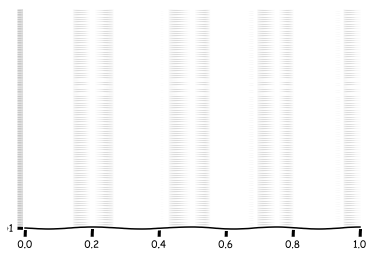

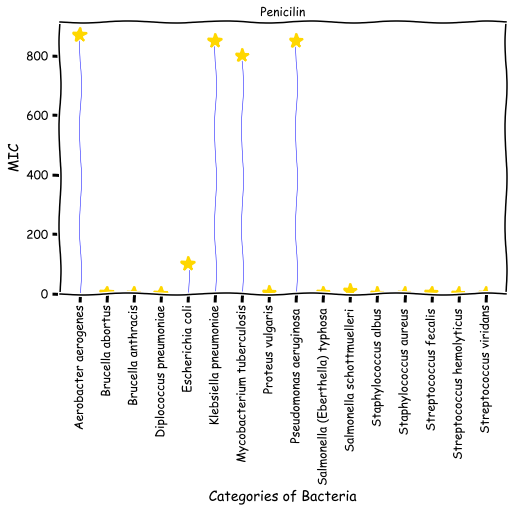

In [274]:
############################
plt.subplots(311)
plt.figure(figsize=(8,5))


(markerline, stemlines, baseline) = plt.stem(pl["Bacteria"],pl['MIC'])


plt.setp(markerline, marker='*', markersize=14,
         markeredgewidth=2, color='gold')
plt.setp(stemlines, linestyle="-",linewidth=0.5, color='blue')
plt.setp(baseline, visible=False)
plt.tick_params(labelsize=12)
plt.xticks(rotation='vertical')
plt.xlabel('Categories of Bacteria', size=14)
plt.ylabel('MIC', size=14)
plt.ylim(bottom=0)
plt.title("Penicilin")

 
############################

# plt.subplots(312)
# plt.figure(figsize=(8,5))
# (markerline, stemlines, baseline) = plt.stem(df_wide["Bacteria"],df_wide["Streptomycin"])

# plt.setp(markerline, marker='*', markersize=14,
#          markeredgewidth=2, color='gold')
# plt.setp(stemlines, linewidth=0.5, color='blue')
# plt.setp(baseline, visible=False)
# plt.tick_params(labelsize=12)
# plt.xticks(rotation='vertical')
# plt.xlabel('Categories of Bacteria', size=14)
# plt.ylabel('MIC', size=14)
# plt.ylim(bottom=0)
# plt.title("Streptomycin")


# plt.show()





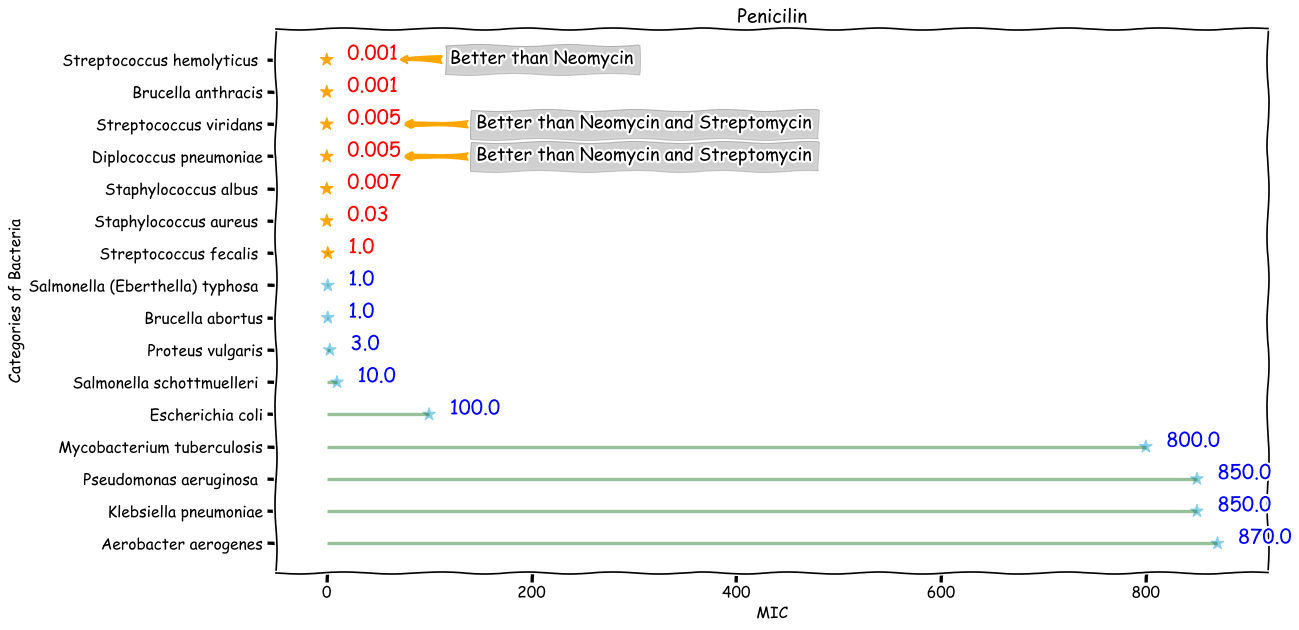

In [426]:
# Reorder it following the values:
plt.xkcd()

ordered_pl = pl.sort_values(by='MIC', ascending=False)
 
# Create a color if the group is "positive"
ordered_pl.loc[ordered_pl["Gram Staining "] == 'positive', 'colors'] = 'orange'
ordered_pl.loc[ordered_pl["Gram Staining "] == 'negative', 'colors'] = 'skyblue'


ordered_pl.head(20)

# #draw the plot
plt.figure(figsize=(16,9),dpi= 80)

plt.hlines(y=ordered_pl["Bacteria"], xmin=0, xmax=ordered_pl["MIC"], color="darkgreen", 
           alpha=0.4, linewidth=3)


#
ordered_pl["mark"]=ordered_pl["MIC"]+20


plt.scatter(y=ordered_pl["Bacteria"], 
            x=ordered_pl["MIC"],
            color=ordered_pl["colors"], 
            s=140,
            marker="*",
            #s=[200 if x in ['Aerobacter aerogenes','Pseudomonas aeruginosa ','Klebsiella pneumoniae'] else 20 for x in ordered_pl["Bacteria"]],
            alpha=1)

##add text
for x, y, tex, note in zip(ordered_pl["mark"], ordered_pl["Bacteria"], ordered_pl["MIC"], ordered_pl["Gram Staining "]):
     t=plt.text(x, y, round(tex,3),
              fontdict={'color':'red' if note=="positive"  else 'blue', 'size':18}
                 )


plt.title('Penicilin')
plt.xlabel('MIC', size=14)
plt.ylabel('Categories of Bacteria', size=14)


#add annotation 
plt.annotate("Better than Neomycin", xy=(70, 15), xytext=(210, 15),
            fontsize=16, ha='center', va='center',
             bbox=dict(boxstyle='square', fc='gray', alpha=0.2),
            arrowprops=dict(arrowstyle='Fancy, head_length=.4, head_width=.4, tail_width=.4', lw=1.5, color='orange'), color='black')


plt.annotate("Better than Neomycin and Streptomycin", xy=(75, 12), xytext=(310, 12),
            fontsize=16, ha='center', va='center',
             bbox=dict(boxstyle='square', fc='gray', alpha=0.2),
            arrowprops=dict(arrowstyle='Fancy, head_length=.4, head_width=.4, tail_width=.4', lw=1.5, color='orange'), color='black')


plt.annotate("Better than Neomycin and Streptomycin", xy=(75, 13), xytext=(310, 13),
            fontsize=16, ha='center', va='center',
             bbox=dict(boxstyle='square', fc='gray', alpha=0.2),
            arrowprops=dict(arrowstyle='Fancy, head_length=.4, head_width=.4, tail_width=.4', lw=1.5, color='orange'), color='black')


plt.savefig("Penicilin.png")
# #Brucella
#streptoccus



In [276]:
st=df.loc[df['Antibiotic'] == "Streptomycin "]

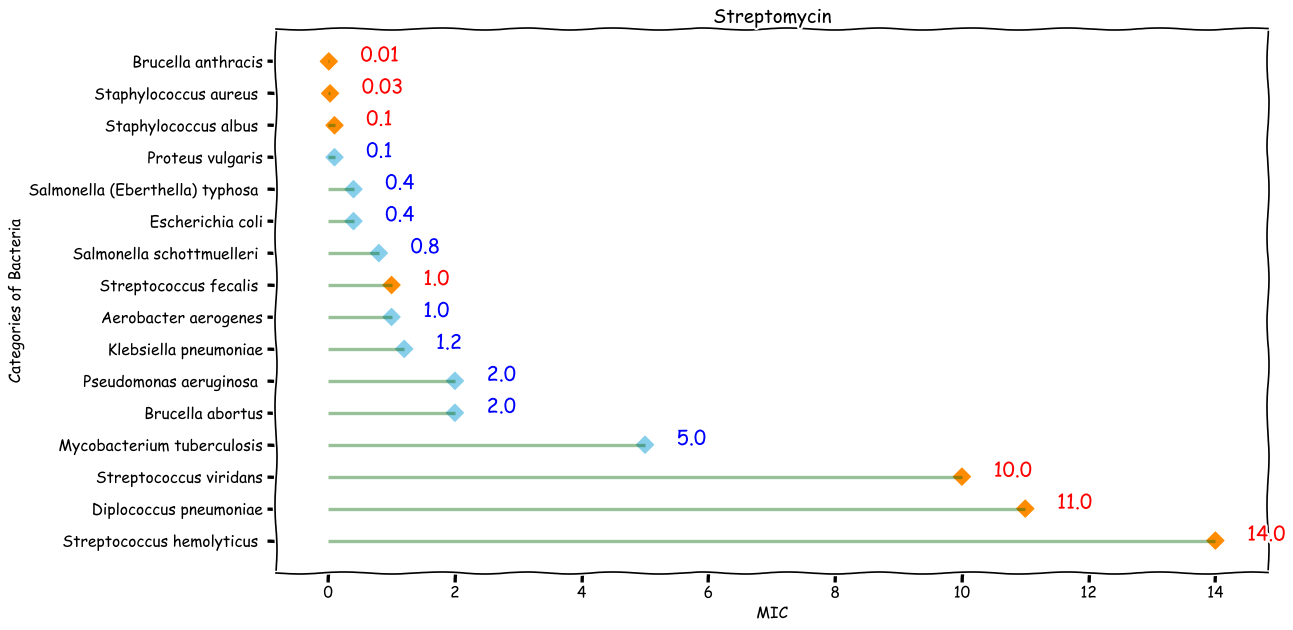

In [427]:
ordered_st = st.sort_values(by='MIC', ascending=False)

# Create a color if the group is "positive"
ordered_st.loc[ordered_st["Gram Staining "] == 'positive', 'colors'] = 'darkorange'
ordered_st.loc[ordered_st["Gram Staining "] == 'negative', 'colors'] = 'skyblue'

 
# #draw the plot
plt.figure(figsize=(16,9),dpi= 80)

plt.hlines(y=ordered_st["Bacteria "], xmin=0, xmax=ordered_st["MIC"], color="darkgreen", 
           alpha=0.4, linewidth=3)

#
ordered_st["mark"]=ordered_st["MIC"]+0.5


plt.scatter(y=ordered_st["Bacteria "], 
            x=ordered_st["MIC"],
            color=ordered_st["colors"], 
            s=120,
            marker="D",
            #s=[200 if x in ['Aerobacter aerogenes','Pseudomonas aeruginosa ','Klebsiella pneumoniae'] else 20 for x in ordered_pl["Bacteria"]],
            alpha=1)


##add text
for x, y, tex, note in zip(ordered_st["mark"], ordered_st["Bacteria "], ordered_st["MIC"], ordered_st["Gram Staining "]):
     t=plt.text(x, y, round(tex,3),
              fontdict={'color':'red' if note=="positive"  else 'blue', 'size':18}
                 )


plt.title('Streptomycin')
plt.xlabel('MIC', size=14)
plt.ylabel('Categories of Bacteria', size=14)
plt.savefig("Streptomycin.png")

In [245]:

ny=df.loc[df['Antibiotic'] == "Neomycin"]

ny.head(3)

,Bacteria,Antibiotic,MIC,Gram Staining
32,Aerobacter aerogenes,Neomycin,1.600,negative
33,Brucella abortus,Neomycin,0.020,negative
34,Brucella anthracis,Neomycin,0.007,positive


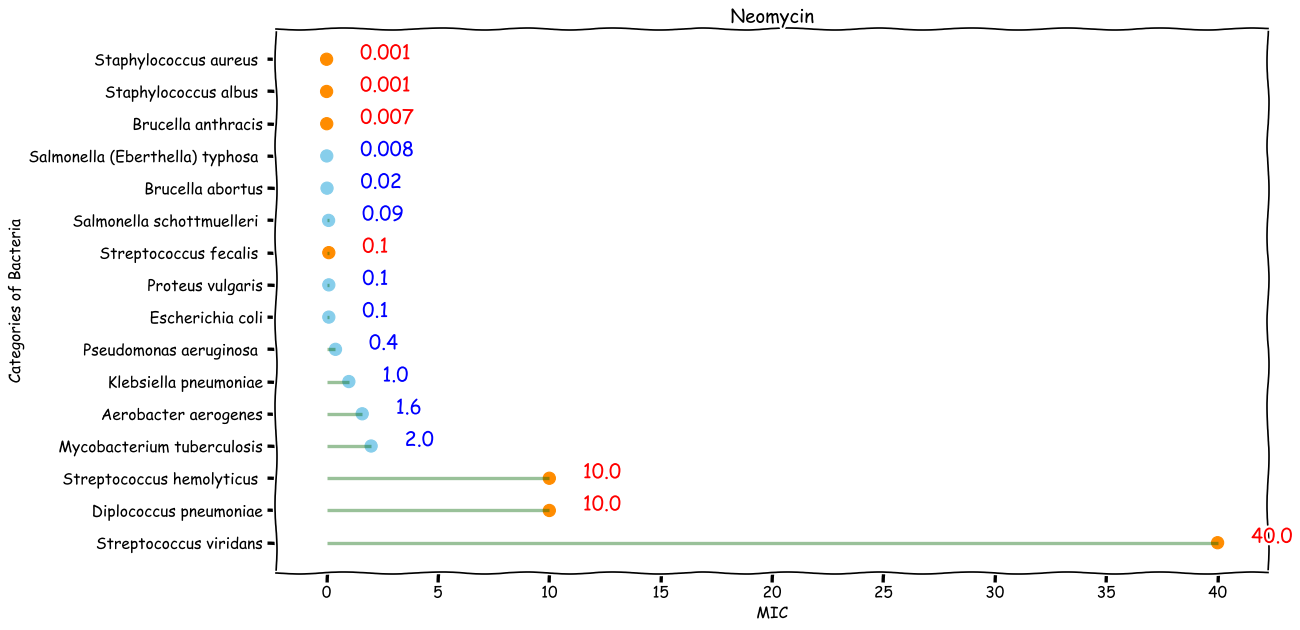

In [428]:
ordered_ny = ny.sort_values(by='MIC', ascending=False)

# Create a color if the group is "positive"
ordered_ny.loc[ordered_ny["Gram Staining "] == 'positive', 'colors'] = 'darkorange'
ordered_ny.loc[ordered_ny["Gram Staining "] == 'negative', 'colors'] = 'skyblue'

 

# #draw the plot
plt.figure(figsize=(16,9),dpi= 80)

plt.hlines(y=ordered_ny["Bacteria "], xmin=0, xmax=ordered_ny["MIC"], color="darkgreen", 
           alpha=0.4, linewidth=3)

#
ordered_ny["mark"]=ordered_ny["MIC"]+1.5


plt.scatter(y=ordered_ny["Bacteria "], 
            x=ordered_ny["MIC"],
            color=ordered_ny["colors"], 
            s=120,
            marker="o",
            #s=[200 if x in ['Aerobacter aerogenes','Pseudomonas aeruginosa ','Klebsiella pneumoniae'] else 20 for x in ordered_pl["Bacteria"]],
            alpha=1)

##add text
for x, y, tex, note in zip(ordered_ny["mark"], ordered_ny["Bacteria "], ordered_ny["MIC"], ordered_ny["Gram Staining "]):
     t=plt.text(x, y, round(tex,3),
              fontdict={'color':'red' if note=="positive"  else 'blue', 'size':18}
                 )

##annotation 
#very efficiently treating Escherichia coli than Penicilin
#very efficiently treat pseudomnas than Penicilin
#very efficiently treat pseudomnas than klebiella than Penicilin 
#

plt.title('Neomycin')
plt.xlabel("MIC", size=14)
plt.ylabel('Categories of Bacteria', size=14)
plt.savefig("Neomycin.png")